### **Load Data**

In [1]:
import pandas as pd

# Load data set

def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

file_path = '../data/flight_df.csv'
df = load_data(file_path)

df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


### **Model Validation**

In [2]:
from sklearn.model_selection import train_test_split

# Define target variable
y =df['satisfied']
X = df.drop(columns='satisfied')

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check for class imbalance
y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

### **Preprocessing**

In [4]:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# Select numeric and categorical columns
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

# Instantiate transformer
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
imputer = KNNImputer(n_neighbors=2, weights='uniform') # Use KNN algorithm to impute missing values to preserve data integrity

# preprocessing pipeline
def preprocessing_pipeline():
    
    num_pipe = Pipeline([
        ('scaler', scaler),
        ('imputer', imputer)
    ])
    
    cat_pipe = Pipeline([
        ('encoder', encoder)
    ])
    
    preprocessor = ColumnTransformer([
        ('numeric', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
    ])
    
    return preprocessor

# Create preprocessor object
preprocessor = preprocessing_pipeline()

In [5]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling TEchnique
from imblearn. pipeline import Pipeline as ImbalancePipeline

# Create sampler pipeline
def sampler_pipeline(sampler):
    
    return ImbalancePipeline([
        ('sampler', sampler)
    ])
    
# Create sampler object
sampler = sampler_pipeline(SMOTE(random_state=42))

# preprocess and rebalance the dataset
def preprocess_and_rebalance(preprocessor, X_train, X_test, y_train):
    
    # transform training data to the fitted transformer
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # Rebalance training load_data
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train_transformed, y_train)
    
    return X_train_balanced, X_test_transformed, y_train_balanced

# Preprocess and Rebalance the dataset

X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance(preprocessor, X_train, X_test, y_train)

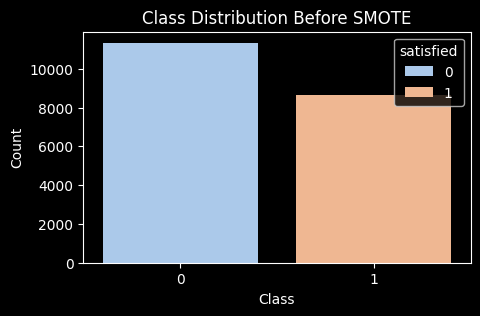

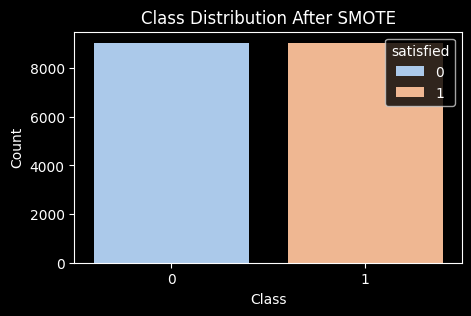

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark mode
plt.style.use('dark_background')

# Visualize data before SMOTE
def plot_distribution(y, title):
    plt.figure(figsize=(5, 3))
    sns.countplot(
        x=y, # y is the target variable 'satisfied'
        palette = 'pastel',
        hue=y
    )
    
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
    
# Visualize data before SMOTE
plot_distribution(y, title='Class Distribution Before SMOTE')

# Visualize data after SMOTE
plot_distribution(y_train_balanced, title='Class Distribution After SMOTE')